In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import operator

In [21]:
train = pd.read_csv('mimic_train.csv')
val = pd.read_csv('mimic_val.csv')
test = pd.read_csv('mimic_test.csv')

In [22]:
icd_counter = Counter()
for icd_string in train['ICD9_CODE']:
    icd_counter.update(icd_string.split(','))
for icd_string in val['ICD9_CODE']:
    icd_counter.update(icd_string.split(','))
for icd_string in test['ICD9_CODE']:
    icd_counter.update(icd_string.split(','))

In [23]:
icd_counter.most_common(10)

[('4019', 20713),
 ('4280', 13507),
 ('42731', 13142),
 ('41401', 12669),
 ('5849', 9209),
 ('25000', 9063),
 ('2724', 8602),
 ('51881', 7609),
 ('5990', 6762),
 ('53081', 6306)]

In [24]:
ccs_counter = Counter()
for ccs_string in train['CCS']:
    ccs_counter.update(ccs_string.split(', '))
for ccs_string in val['CCS']:
    ccs_counter.update(ccs_string.split(', '))
for ccs_string in test['CCS']:
    ccs_counter.update(ccs_string.split(', '))

In [25]:
ccs_counter.most_common(10)

[('89', 27448),
 ('96', 21541),
 ('86', 21169),
 ('54', 20681),
 ('94', 19989),
 ('225', 17581),
 ('52', 14707),
 ('1', 13575),
 ('246', 13223),
 ('119', 12374)]

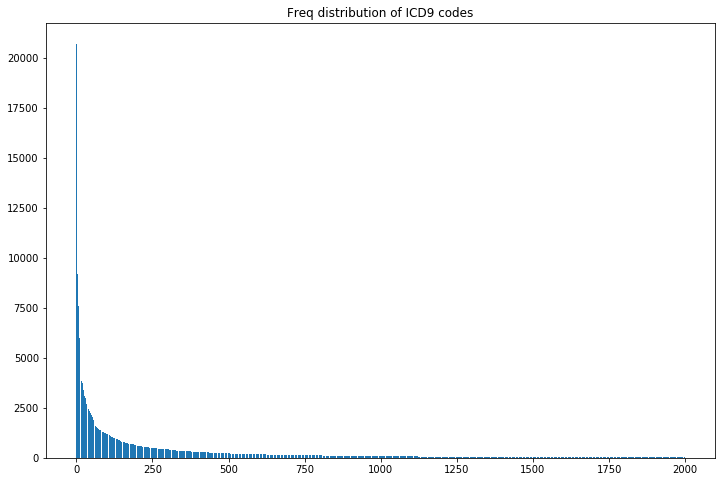

In [19]:
icd_counter_sorted = sorted(icd_counter.items(), key=operator.itemgetter(1), reverse=True)

labels = [item[0] for item in icd_counter_sorted]
values = [item[1] for item in icd_counter_sorted][:2000]
indexes = np.arange(len(values))[:2000]

fig = plt.figure(figsize=(12,8))
plt.title('Freq distribution of ICD9 codes')
plt.bar(indexes, values)
plt.show()

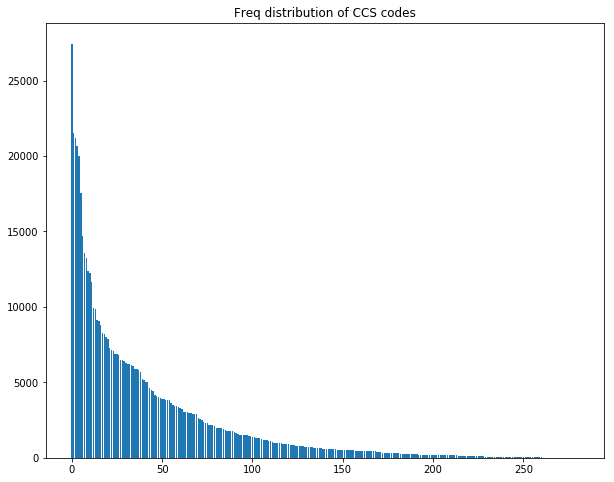

In [15]:
ccs_counter_sorted = sorted(ccs_counter.items(), key=operator.itemgetter(1), reverse=True)

labels = [item[0] for item in ccs_counter_sorted]
values = [item[1] for item in ccs_counter_sorted]
indexes = np.arange(len(values))

fig = plt.figure(figsize=(10,8))
plt.title('Freq distribution of CCS codes')
plt.bar(indexes, values)
plt.show()

In [46]:
ccs_250 = set([item[0] for item in ccs_counter.most_common(250)])
icd_1000 = set([item[0] for item in icd_counter.most_common(1000)])

In [130]:
ccs_counter.most_common(250)[-1]

('8', 36)

In [131]:
icd_counter.most_common(1000)[-1]

('V851', 80)

In [120]:
ccs_train, ccs_val, ccs_test = train.copy(), val.copy(), test.copy()
ccs_train['CCS'] = [list(set(ccs_list).intersection(ccs_250)) for ccs_list in train['CCS'].copy()]
ccs_train['CCS'] = [','.join(ccs_list) for ccs_list in ccs_train['CCS']]
ccs_val['CCS'] = [list(set(ccs_list).intersection(ccs_250)) for ccs_list in val['CCS'].copy()]
ccs_val['CCS'] = [','.join(ccs_list) for ccs_list in ccs_val['CCS']]
ccs_test['CCS'] = [list(set(ccs_list).intersection(ccs_250)) for ccs_list in test['CCS'].copy()]
ccs_test['CCS'] = [','.join(ccs_list) for ccs_list in ccs_test['CCS']]

In [100]:
icd_train, icd_val, icd_test = train.copy(), val.copy(), test.copy()
icd_train['ICD9_CODE'] = [list(set(icd_list.split(',')).intersection(icd_1000)) for icd_list in train['ICD9_CODE'].copy()]
icd_train['ICD9_CODE'] = [','.join(icd_list) for icd_list in icd_train['ICD9_CODE']]
icd_val['ICD9_CODE'] = [list(set(icd_list.split(',')).intersection(icd_1000)) for icd_list in val['ICD9_CODE'].copy()]
icd_val['ICD9_CODE'] = [','.join(icd_list) for icd_list in icd_val['ICD9_CODE']]
icd_test['ICD9_CODE'] = [list(set(icd_list.split(',')).intersection(icd_1000)) for icd_list in test['ICD9_CODE'].copy()]
icd_test['ICD9_CODE'] = [','.join(icd_list) for icd_list in icd_test['ICD9_CODE']]

In [102]:
# check if there are instances containing no label

In [110]:
def count_ccs_non_label(dataset):
    count = 0
    for string in dataset['CCS']:
        if len(string) == 0:
            count += 1
    print('{} instances have no label.'.format(count))
    
def count_icd_non_label(dataset):
    count = 0
    for string in dataset['ICD9_CODE']:
        if len(string) == 0:
            count += 1
    print('{} instances have no label.'.format(count))

In [113]:
count_ccs_non_label(ccs_train)
count_ccs_non_label(ccs_val)
count_ccs_non_label(ccs_test)

0 instances have no label.
0 instances have no label.
0 instances have no label.


In [114]:
count_icd_non_label(icd_train)
count_icd_non_label(icd_val)
count_icd_non_label(icd_test)

129 instances have no label.
10 instances have no label.
19 instances have no label.


In [123]:
# check if labels in val or test set appeared in train set
ccs_train_label, ccs_val_label, ccs_test_label = set(), set(), set()
for string in ccs_train['CCS']:
    ccs_train_label.update(string.split(','))
for string in ccs_val['CCS']:
    ccs_val_label.update(string.split(','))
for string in ccs_test['CCS']:
    ccs_test_label.update(string.split(','))
    
icd_train_label, icd_val_label, icd_test_label = set(), set(), set()
for string in icd_train['ICD9_CODE']:
    icd_train_label.update(string.split(','))
for string in icd_val['ICD9_CODE']:
    icd_val_label.update(string.split(','))
for string in icd_test['ICD9_CODE']:
    icd_test_label.update(string.split(','))

In [124]:
ccs_val_label.difference(ccs_val_label.intersection(ccs_train_label))

set()

In [125]:
ccs_test_label.difference(ccs_test_label.intersection(ccs_train_label))

set()

In [126]:
icd_val_label.difference(icd_val_label.intersection(icd_train_label))

set()

In [127]:
icd_test_label.difference(icd_test_label.intersection(icd_train_label))

set()

In [128]:
ccs_train.to_csv('ccs_train.csv')
ccs_val.to_csv('ccs_val.csv')
ccs_test.to_csv('ccs_test.csv')

In [129]:
icd_train.to_csv('icd_train.csv')
icd_val.to_csv('icd_val.csv')
icd_test.to_csv('icd_test.csv')